# Korean NLP

[Data source](https://play.google.com/store/apps/details?id=com.facebook.katana&hl=ko&gl=US&showAllReviews=true)

[web cralwer](http://localhost:8888/notebooks/Documents/Git/WebCrawler/Google%20App%20Play%20Web%20Scraping.ipynb)

In [46]:
file = r"/Users/reejungkim/Documents/Git/WebCrawler/coupang_eats_ko_kr.csv"
target = 'coupang'

In [47]:
import pandas as pd
import numpy as np
import os
import datetime as dt

import emoji


import konlpy
from konlpy.utils import pprint


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import urllib.request



import seaborn as sns
sns.set_palette("light:#5A9")

!pip install soylemma

In [48]:
from soylemma import Lemmatizer

In [49]:
lemmatizer = Lemmatizer()
lemmatizer.analyze('준다는데')

[(('줄', 'Verb'), ('ㄴ다는데', 'Eomi')), (('주', 'Verb'), ('ㄴ다는데', 'Eomi'))]

In [50]:
df = pd.read_csv(file, index_col=None)

In [51]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,891c64ac-65d3-4195-9fe3-aff249992735,VLOG마상,https://play-lh.googleusercontent.com/a-/AD5-W...,배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨,2,0,1.3.79,2023-01-02 21:06:18,"안녕하세요, 쿠팡이츠 입니다.\n\n고객님께서는 쿠팡이츠를 이용하시며 맛있는 음식이...",2023-01-03 09:53:47
1,1,86d723e5-beb0-4b2c-ac9e-3d0bdfdb7422,이니는풍산개다,https://play-lh.googleusercontent.com/a-/AD5-W...,배딜료가 넘비싸,3,0,1.3.79,2023-01-02 20:51:38,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저, 쿠팡이츠를 이용해 주시는 과정에 배달비로...",2023-01-03 09:52:26
2,2,28870510-8c42-471f-a599-853660a54848,Euna,https://play-lh.googleusercontent.com/a/AEdFTp...,시의 경계에 살고 있는데 다른 시의 업체들이 거리상 가까우니 목록에 뜨는데 다른 시...,2,0,1.3.79,2023-01-02 18:29:54,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저 쿠팡이츠 APP을 이용하시는 과정에 불편을...",2023-01-03 09:44:18
3,3,9064b57a-740b-41de-b56d-660092b75cad,이제덕,https://play-lh.googleusercontent.com/a/AEdFTp...,사용하는데 편리하고 좋네요,4,0,1.3.79,2023-01-02 17:30:13,"안녕하세요, 쿠팡이츠 입니다.\n\n쿠팡이츠는 한층 더 강화된 서비스를 제공하며, ...",2023-01-02 18:14:54
4,4,e8813cb7-b013-425f-be95-d9c88242eea4,연상소,https://play-lh.googleusercontent.com/a/AEdFTp...,메뉴 보기가 편함,4,0,1.3.79,2023-01-02 16:01:41,"안녕하세요, 쿠팡이츠 입니다.\n\n쿠팡이츠는 한 집 배달을 원칙으로 한층 더 강화...",2023-01-02 16:34:22


# 탐색적 분석 (EDA) 

In [52]:
df.shape

(26799, 11)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26799 entries, 0 to 26798
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            26799 non-null  int64 
 1   reviewId              26799 non-null  object
 2   userName              26799 non-null  object
 3   userImage             26799 non-null  object
 4   content               26799 non-null  object
 5   score                 26799 non-null  int64 
 6   thumbsUpCount         26799 non-null  int64 
 7   reviewCreatedVersion  24358 non-null  object
 8   at                    26799 non-null  object
 9   replyContent          1270 non-null   object
 10  repliedAt             1270 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.2+ MB


df['review_date'] = df['review_date'].str.replace('년 ','/').str.replace('월 ', '/').str.replace('일', '/')

In [54]:
df['review_date'] = pd.to_datetime(df['at'])

df['year-m'] = df['review_date'].dt.strftime('%Y-%m')

In [55]:
df.head(2)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date
0,0,891c64ac-65d3-4195-9fe3-aff249992735,VLOG마상,https://play-lh.googleusercontent.com/a-/AD5-W...,배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨,2,0,1.3.79,2023-01-02 21:06:18,"안녕하세요, 쿠팡이츠 입니다.\n\n고객님께서는 쿠팡이츠를 이용하시며 맛있는 음식이...",2023-01-03 09:53:47,2023-01-02 21:06:18
1,1,86d723e5-beb0-4b2c-ac9e-3d0bdfdb7422,이니는풍산개다,https://play-lh.googleusercontent.com/a-/AD5-W...,배딜료가 넘비싸,3,0,1.3.79,2023-01-02 20:51:38,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저, 쿠팡이츠를 이용해 주시는 과정에 배달비로...",2023-01-03 09:52:26,2023-01-02 20:51:38


plt.figure(figsize=(5,3))

ax = df.groupby('year-m')['review'].count().plot(kind='bar', color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Number of reviews added")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='at',data=df, hue='star', dodge=False, order=df['at'].sort_values().unique()) 
plt.show()

## 텍스트 정재 Clean texts

### Clean star rating

df['star'] = df['star'].str.replace('별표 5개 만점에 ', '').str.replace('개를 받았습니다.', '')

In [56]:
df['score'] = df['score'].astype(str).astype(int)

In [57]:
df.head(3)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date
0,0,891c64ac-65d3-4195-9fe3-aff249992735,VLOG마상,https://play-lh.googleusercontent.com/a-/AD5-W...,배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨,2,0,1.3.79,2023-01-02 21:06:18,"안녕하세요, 쿠팡이츠 입니다.\n\n고객님께서는 쿠팡이츠를 이용하시며 맛있는 음식이...",2023-01-03 09:53:47,2023-01-02 21:06:18
1,1,86d723e5-beb0-4b2c-ac9e-3d0bdfdb7422,이니는풍산개다,https://play-lh.googleusercontent.com/a-/AD5-W...,배딜료가 넘비싸,3,0,1.3.79,2023-01-02 20:51:38,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저, 쿠팡이츠를 이용해 주시는 과정에 배달비로...",2023-01-03 09:52:26,2023-01-02 20:51:38
2,2,28870510-8c42-471f-a599-853660a54848,Euna,https://play-lh.googleusercontent.com/a/AEdFTp...,시의 경계에 살고 있는데 다른 시의 업체들이 거리상 가까우니 목록에 뜨는데 다른 시...,2,0,1.3.79,2023-01-02 18:29:54,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저 쿠팡이츠 APP을 이용하시는 과정에 불편을...",2023-01-03 09:44:18,2023-01-02 18:29:54


plt.figure(figsize=(5,3))
sns.countplot(x='star',data=df) #,hue='year-m', dodge=False)
plt.show()

In [58]:
count_stars = pd.pivot_table(df, values='content', index=['score'], aggfunc='count') #df.groupby(['star']).size().reset_index(name='counts') 
count_stars

,content
score,
1,6267
2,492
3,767
4,1458
5,17815


In [65]:
pd.pivot_table(df,index='score',values='content',
               aggfunc = lambda x: (round(x.count()/df['content'].count() * 100,2)).astype(str) + '%' )

,content
score,
1,23.39%
2,1.84%
3,2.86%
4,5.44%
5,66.48%


#### star ratings weighted by reviewer ratings
공감을 많이 받은 별점에 무게를 더한 값

In [66]:
count_stars_weighted = pd.pivot_table(df, values='thumbsUpCount', index=['score'], aggfunc=np.sum)
count_stars_weighted

,thumbsUpCount
score,
1,66388
2,6016
3,7070
4,6718
5,24021


In [75]:
count_stars_weighted = pd.pivot_table(df,index='score',values='thumbsUpCount',
               aggfunc = lambda x: (round(x.count()/df['content'].count() * 100,2)).astype(str) + '%' )
count_stars_weighted

,thumbsUpCount
score,
1,23.39%
2,1.84%
3,2.86%
4,5.44%
5,66.48%


In [76]:
count_stars

,content
score,
1,6267
2,492
3,767
4,1458
5,17815


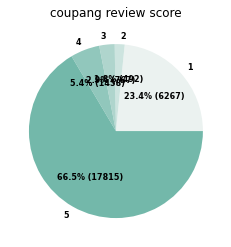

In [77]:
import matplotlib.pyplot as plt
#from palettable.colorbrewer.qualitative import Pastel1_7

plt.figure(figsize=(5,4))
my_circle=plt.Circle((0,0), 0.4, color='white')

textprops={"color":"black","size":8,
"weight":"bold"}  

plt.pie( count_stars.content, 
        labels=count_stars.index, startangle=0,
        #autopct='%.1f%%'
        autopct=lambda p: "{:.1f}% ({:.0f})".format(p, p/100*count_stars.content.sum()),
        textprops=textprops
        ) #,colors=Pastel1_7.hex_colors)

#p=plt.gcf()


plt.title(target + ' review score')
plt.savefig(target+"_review_score.png")
plt.show()


공감을 가장 많이 얻은 리뷰 Top10

In [80]:
df[['content', 'thumbsUpCount', 'score']].sort_values(by='thumbsUpCount', ascending=False)[:10]#.to_csv(target_+'공감많은순_탑10.csv')

,content,thumbsUpCount,score
16075,배달원 이상한 사람 정말 많네요. 오늘 진짜로 빈정 상했어요. 고객센터에서 대응도 ...,1189,1
10576,배달비가 표기된가격보다 비쌉니다. 자세히보기를 눌러야만 실제 지불가격이 나와요. 어...,923,1
9111,배달료무료 표기 수정 요청드립니다. 무료배송이라고 표기 되어 있어서 무료인줄 알았더...,912,2
18843,"쓴지 일주일도 안돼서 지우게 하시네요. 치타배달이라고 돈 더 냈는데, 예상 시간보다...",873,1
8955,이용은 잘 하고 있습니다만...무료배달 이라는 문구는 수정이 필요하겠네요. 조건부 ...,822,3
18965,"배달비 무료라고 써놓았는데, 음식 고르고 주문하려 하면 소액주문 추가비용 붙이는게 ...",701,1
23761,1. 결제되면 주소 변동 불가능 2. 주문 1분 안되서 들어감(앱 취소불가능) 3....,669,1
9431,주문 배달 전문이라 다 좋지만 사실과 다른 광고는 없어져야 합니다. 예를들어서 배송...,658,3
4626,전에 5점줬었는데 쓰다가 불편한 부분이 있었어서 변경합니다. 요즘 배달을 시켜먹을 ...,643,4
17845,쿠팡에 비해 쿠팡이츠는 아직도 개선할 점이 많아 보입니다. 분명히 제대로 주문했는데...,615,1


df.loc[df.reviewer_ratings.isnull()]

### 이모티콘 추출 Extract emojis

In [81]:
df.content

0           배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨
1                                                 배딜료가 넘비싸
2        시의 경계에 살고 있는데 다른 시의 업체들이 거리상 가까우니 목록에 뜨는데 다른 시...
3                                           사용하는데 편리하고 좋네요
4                                                메뉴 보기가 편함
                               ...                        
26794                                   배달속도 장난아니네요... ㅎㄷㄷ
26795                                                    굿
26796                      사용하기 좋아요! 앞으로 업체수가 많아졌으면 좋겠습니다.
26797                                            배달 겁나 왕빠름
26798                                             쿠팡 이츠 대박
Name: content, Length: 26799, dtype: object

In [82]:
def extract_emojis(string):
    emoticon = "".join(c for c in string if c in emoji.UNICODE_EMOJI)
    if emoticon!="":
        return emoticon
    return None

In [83]:
df['emoji']=df['content'].apply(lambda x: extract_emojis(x))

In [84]:
df.emoji.head()

0    None
1    None
2    None
3    None
4    None
Name: emoji, dtype: object

In [85]:
df[['content','emoji', 'score']].loc[df.emoji.notnull()]

,content,emoji,score


### 명사 추출 (Extract nouns)

kkma과 okt의 다른점

Okt는 Kkma에 비해 비교적 빠른 속도로 처리하지만 지원하는 품사 태그가 적다. 
속도가 중요할 때는 Okt를, 정확한 품사 정보가 필요할 때는 Kkma를 많이 사용.


http://kkma.snu.ac.kr/documents/?doc=postag

In [86]:
from konlpy.tag import Kkma
kkma = Kkma()

from konlpy.tag import Okt
okt = Okt()

print('kkma 사용: {}'.format(kkma.nouns("로그인이 안돼요")))
print('okt 사용: {}'.format(okt.nouns("로그인이 안돼요")))

kkma 사용: ['로그', '로그인', '인']
okt 사용: ['로그인']


In [87]:

from konlpy.tag import Kkma #Twitter

for word in ['했다', '했지만', '하면서도', '했던', '하니까']:
    print(kkma.pos(word))

[('하', 'VV'), ('었', 'EPT'), ('다', 'EFN')]
[('하', 'VV'), ('었', 'EPT'), ('지만', 'ECE')]
[('하면서', 'NNG'), ('도', 'JX')]
[('하', 'VV'), ('었', 'EPT'), ('던', 'EFQ')]
[('하', 'VV'), ('니까', 'ECD')]


In [88]:
%%time 
df['nouns'] = df['content'].apply(lambda x: okt.nouns(x))

CPU times: user 2min 1s, sys: 925 ms, total: 2min 2s
Wall time: 58.5 s


In [89]:
df.head(3)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date,emoji,nouns
0,0,891c64ac-65d3-4195-9fe3-aff249992735,VLOG마상,https://play-lh.googleusercontent.com/a-/AD5-W...,배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨,2,0,1.3.79,2023-01-02 21:06:18,"안녕하세요, 쿠팡이츠 입니다.\n\n고객님께서는 쿠팡이츠를 이용하시며 맛있는 음식이...",2023-01-03 09:53:47,2023-01-02 21:06:18,None,"[배달, 기사, 배달, 지연, 갈수록, 배달, 지연, 계속]"
1,1,86d723e5-beb0-4b2c-ac9e-3d0bdfdb7422,이니는풍산개다,https://play-lh.googleusercontent.com/a-/AD5-W...,배딜료가 넘비싸,3,0,1.3.79,2023-01-02 20:51:38,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저, 쿠팡이츠를 이용해 주시는 과정에 배달비로...",2023-01-03 09:52:26,2023-01-02 20:51:38,None,[배딜료]
2,2,28870510-8c42-471f-a599-853660a54848,Euna,https://play-lh.googleusercontent.com/a/AEdFTp...,시의 경계에 살고 있는데 다른 시의 업체들이 거리상 가까우니 목록에 뜨는데 다른 시...,2,0,1.3.79,2023-01-02 18:29:54,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저 쿠팡이츠 APP을 이용하시는 과정에 불편을...",2023-01-03 09:44:18,2023-01-02 18:29:54,None,"[시, 경계, 살, 다른, 시, 업체, 거리, 목록, 다른, 시라, 배달, 기사, ..."


In [90]:
df.nouns.isnull().sum()

0

### 불용어 정리 Remove Stopwords

In [91]:
stopwords = ['덕분', '안', '중','때문', '짓', '이것', '하', '거', '식', '시', '앱', '뭐', '데','나', '개','페', '주세',
             '이거', '일', '업', '북', '인', '구', '저', '해','해보고','대','여', '페북', '페이스북', '페이스', '수', 
             '전', '제가','제','것','이것' , '좀', '왜','어째서', '재', '때', '계속', '후', '다시', '요','를', '을', 
             '무슨','못','사', '진짜', '제발','비', '자꾸', '츠궁', '뿌']

In [92]:
with open('/Users/reejungkim/Documents/Git/NLP/한국어불용어100.txt') as f:
    lines = f.readlines()
    result=[]
    for x in lines:
        result.append(x.split('\t')[0])
    f.close()


In [93]:
stopwords = stopwords + result

In [94]:
def removeStopWords(Noun_words):
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: 
                Noun_words.remove(word) 
    return Noun_words

In [95]:
df['nouns'] = df['nouns'].apply(lambda x: removeStopWords(x))

In [96]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review_date,emoji,nouns
0,0,891c64ac-65d3-4195-9fe3-aff249992735,VLOG마상,https://play-lh.googleusercontent.com/a-/AD5-W...,배달기사가 없다고 배달이 19분에서 37분이 지연됨 ㅋㅋㅋ 갈수록 배달지연이 계속됨,2,0,1.3.79,2023-01-02 21:06:18,"안녕하세요, 쿠팡이츠 입니다.\n\n고객님께서는 쿠팡이츠를 이용하시며 맛있는 음식이...",2023-01-03 09:53:47,2023-01-02 21:06:18,None,"[배달, 기사, 배달, 지연, 갈수록, 배달, 지연]"
1,1,86d723e5-beb0-4b2c-ac9e-3d0bdfdb7422,이니는풍산개다,https://play-lh.googleusercontent.com/a-/AD5-W...,배딜료가 넘비싸,3,0,1.3.79,2023-01-02 20:51:38,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저, 쿠팡이츠를 이용해 주시는 과정에 배달비로...",2023-01-03 09:52:26,2023-01-02 20:51:38,None,[배딜료]
2,2,28870510-8c42-471f-a599-853660a54848,Euna,https://play-lh.googleusercontent.com/a/AEdFTp...,시의 경계에 살고 있는데 다른 시의 업체들이 거리상 가까우니 목록에 뜨는데 다른 시...,2,0,1.3.79,2023-01-02 18:29:54,"안녕하세요, 쿠팡이츠 입니다.\n\n먼저 쿠팡이츠 APP을 이용하시는 과정에 불편을...",2023-01-03 09:44:18,2023-01-02 18:29:54,None,"[경계, 업체, 거리, 목록, 시라, 배달, 기사, 배달, 항상, 배달, 음식, 항..."
3,3,9064b57a-740b-41de-b56d-660092b75cad,이제덕,https://play-lh.googleusercontent.com/a/AEdFTp...,사용하는데 편리하고 좋네요,4,0,1.3.79,2023-01-02 17:30:13,"안녕하세요, 쿠팡이츠 입니다.\n\n쿠팡이츠는 한층 더 강화된 서비스를 제공하며, ...",2023-01-02 18:14:54,2023-01-02 17:30:13,None,[사용]
4,4,e8813cb7-b013-425f-be95-d9c88242eea4,연상소,https://play-lh.googleusercontent.com/a/AEdFTp...,메뉴 보기가 편함,4,0,1.3.79,2023-01-02 16:01:41,"안녕하세요, 쿠팡이츠 입니다.\n\n쿠팡이츠는 한 집 배달을 원칙으로 한층 더 강화...",2023-01-02 16:34:22,2023-01-02 16:01:41,None,"[메뉴, 보기]"


In [97]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### 리뷰 분류 classify reviews


3,4,5 의 점수는 긍정리뷰

1 또는 2의 점수는 부정적리뷰

In [98]:
df_positive_review = df.loc[df.score>=3]

In [99]:
df_negative_review = df.loc[df.score<=2]

### Counter

In [100]:
from collections import Counter

In [101]:
#카운터 쓰임예제
c = Counter(df.nouns[0])
print(c.most_common(10))

[('배달', 3), ('지연', 2), ('기사', 1), ('갈수록', 1)]


In [102]:
def common_words(df, col, n):
    counts = Counter([item for sublist in df[col] for item in sublist])
    common_words = pd.DataFrame(counts.most_common(n))
    common_words.columns =['Word','count']
    return common_words

In [103]:
common_review = common_words(df, 'nouns', 50)

In [104]:
common_review

,Word,count
0,배달,12119
1,쿠팡,4093
2,주문,2443
3,츠,2312
4,음식,1865
5,쿠폰,1834
6,배민,1679
7,사용,1489
8,굿,1407
9,고객,1290


In [105]:
common_positive_review = common_words(df_positive_review, 'nouns', 50)

In [106]:
common_negative_review = common_words(df_negative_review, 'nouns', 50)

In [107]:
common_negative_review.to_excel(target+'_negative_reviews.xlsx')

In [108]:
common_positive_review.to_excel(target+'_positive_reviews.xlsx')

In [514]:
#%%bash
#wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip
#unzip NanumFont_TTF_ALL.zip -d NanumFont
#ls -al

In [109]:
import matplotlib
#matplotlib.matplotlib_fname()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

font_location = '/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [115]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothicOTF') # For MacOS
#plt.rc('font', family='Nanum Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

fontprop = fm.FontProperties(fname='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf', size=18)

['NanumGothicOTF']


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


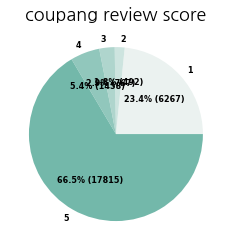

In [116]:
# fname 옵션을 사용하는 방법
path = '/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.pie( count_stars.content, 
        labels=count_stars.index, startangle=0,
        #autopct='%.1f%%'
        autopct=lambda p: "{:.1f}% ({:.0f})".format(p, p/100*count_stars.content.sum()),
        textprops=textprops
        ) #,colors=Pastel1_7.hex_colors)

#p=plt.gcf()


plt.title(target + ' review score', fontproperties=fontprop)
plt.savefig(target+"_review_score.png")
plt.show()

In [117]:

        
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 5

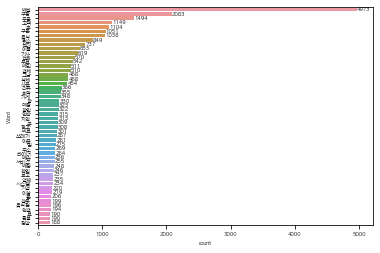

In [118]:

ax = sns.barplot(data=common_negative_review, y='Word', x='count' , ci=None)# fname 옵션을 사용하는 방법

for i in ax.containers:
    ax.bar_label(i,)
plt.savefig(target+"_부정리뷰키워드.png")



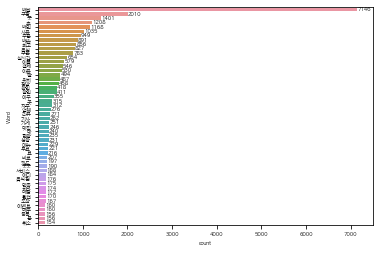

In [114]:

ax = sns.barplot(data=common_positive_review, y='Word', x='count' , ci=None)# fname 옵션을 사용하는 방법

for i in ax.containers:
    ax.bar_label(i,)
plt.savefig(target+"_긍정리뷰키워드.png")

In [119]:
def getCounter(row):
    return dict(Counter(row['nouns']))#.most_common

In [120]:
df['counter']= df.apply(lambda row : getCounter(row), axis=1)

#### Counter without weight

In [121]:
df.counter

0                    {'배달': 3, '기사': 1, '지연': 2, '갈수록': 1}
1                                               {'배딜료': 1}
2        {'경계': 1, '업체': 2, '거리': 1, '목록': 1, '시라': 1, ...
3                                                {'사용': 1}
4                                       {'메뉴': 1, '보기': 1}
                               ...                        
26794                          {'배달': 1, '속도': 1, '장난': 1}
26795                                             {'굿': 1}
26796                          {'사용': 1, '업체': 1, '수가': 1}
26797                                    {'배달': 1, '왕': 1}
26798                          {'쿠팡': 1, '이츠': 1, '대박': 1}
Name: counter, Length: 26799, dtype: object

def getWeightedCounter(row):
    for key, value in row['counter'].items():
        newvalue = value*row['reviewer_ratings'] + 1
        row['counter'][key] = newvalue

df.apply(lambda row : getWeightedCounter(row), axis=1)

#### Counter weighted by reviewer ratings (likes on the review)

In [122]:
df.counter

0                    {'배달': 3, '기사': 1, '지연': 2, '갈수록': 1}
1                                               {'배딜료': 1}
2        {'경계': 1, '업체': 2, '거리': 1, '목록': 1, '시라': 1, ...
3                                                {'사용': 1}
4                                       {'메뉴': 1, '보기': 1}
                               ...                        
26794                          {'배달': 1, '속도': 1, '장난': 1}
26795                                             {'굿': 1}
26796                          {'사용': 1, '업체': 1, '수가': 1}
26797                                    {'배달': 1, '왕': 1}
26798                          {'쿠팡': 1, '이츠': 1, '대박': 1}
Name: counter, Length: 26799, dtype: object

## Visualization

In [123]:
import plotly.express as px

px.treemap(common_review, 
           path=['Word'], values='count',
           title='Most commonly used words',
          width=400, height=400)

In [124]:
fig = px.treemap(common_negative_review, 
           path=['Word'], values='count',
           title='Negative reviews',
          width=400, height=400)

fig.write_html("NegativeReviewsTreeMap_"+target+".html")

fig.show()

In [125]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [126]:
FONT_PATH = '/Users/reejungkim/Documents/Git/NLP/Korean font ttf/BMHANNA_11yrs_ttf.ttf'

words = common_review.set_index("Word")['count'].to_dict()

In [127]:
wc = WordCloud(background_color='white',width=800, height=400, font_path=FONT_PATH)

## negative reviews

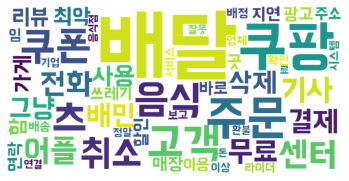

In [128]:
negative_words =common_negative_review.set_index("Word")['count'].to_dict()
wordcloud = wc.generate_from_frequencies(negative_words)
plt.imshow(wordcloud)
plt.savefig(target + " 부정리뷰WC.png")
plt.axis('off')
plt.show()


In [129]:
common_negative_review.Word.values

array(['배달', '쿠팡', '주문', '고객', '츠', '쿠폰', '음식', '취소', '센터', '어플', '기사',
       '전화', '무료', '배민', '결제', '그냥', '삭제', '사용', '리뷰', '최악', '가게', '함',
       '매장', '할인', '연락', '지연', '곳', '광고', '바로', '쓰레기', '이용', '임', '주소',
       '라이더', '배송', '서비스', '배정', '확인', '보고', '업체', '시스템', '기업', '이상', '돈',
       '잘못', '음식점', '연결', '료', '환불', '정말'], dtype=object)

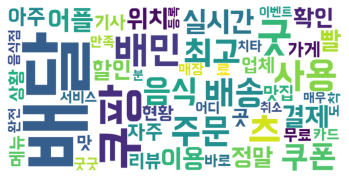

In [130]:
positive_words =common_positive_review.set_index("Word")['count'].to_dict()
wordcloud = wc.generate_from_frequencies(positive_words)
plt.imshow(wordcloud)
plt.savefig("PositiveReviewsWC_hogang.png")
plt.axis('off')
plt.show()

common_negative_review.reset_index(drop=True).values

import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
plt.rc('font', family=font_name)

plt.bar(common_negative_review.Word.values, range(len( common_negative_review)))

common_negative_review.set_index('Word').sort_values(
    by='count', ascending=True).plot(kind='barh') 
